In [1]:
from src.toy_functions import ResponseFunction, six_curve_sum
import torch
from ax import Client, RangeParameterConfig

from torch._tensor import Tensor
import importlib


from botorch.models import SingleTaskGP
import math
import importlib

from src import GPVisualiser, ax_helper
from botorch.models import SingleTaskGP
importlib.reload(GPVisualiser)


<module 'src.GPVisualiser' from 'c:\\GitHub\\BO-Coli\\src\\GPVisualiser.py'>

In [2]:
dim_names = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6']
simple_func = lambda x: sum(torch.sqrt(x))
resp = ResponseFunction(simple_func, len(dim_names))
resp.evaluate(torch.tensor([1., 4., 9., 16., 25., 36.]))

tensor(21.)

In [3]:
from typing import Literal
import pandas as pd
import seaborn as sns


from src.ax_helper import get_guess_coords

# Sobol
The default initial parameter exploration strategy uses SOBOL algorithm:

### log param sobol:

[INFO 09-21 11:03:45] ax.api.client: GenerationStrategy(name='Center+Sobol+MBM:fast', nodes=[CenterGenerationNode(next_node_name='Sobol'), GenerationNode(node_name='Sobol', generator_specs=[GeneratorSpec(generator_enum=Sobol, model_key_override=None)], transition_criteria=[MinTrials(transition_to='MBM'), MinTrials(transition_to='MBM')]), GenerationNode(node_name='MBM', generator_specs=[GeneratorSpec(generator_enum=BoTorch, model_key_override=None)], transition_criteria=[])]) chosen based on user input and problem structure.
[INFO 09-21 11:03:45] ax.api.client: Generated new trial 0 with parameters {'x0': 10.0, 'x1': 10.0, 'x2': 10.0, 'x3': 10.0, 'x4': 10.0, 'x5': 10.0} using GenerationNode CenterOfSearchSpace.
[INFO 09-21 11:03:45] ax.api.client: Generated new trial 1 with parameters {'x0': 54.724473, 'x1': 47.544136, 'x2': 63.805706, 'x3': 67.589935, 'x4': 10.90615, 'x5': 9.610868} using GenerationNode Sobol.
[INFO 09-21 11:03:45] ax.api.client: Generated new trial 2 with parameters {

   trial_name         x0         x1         x2         x3         x4  \
0         0_0  10.000000  10.000000  10.000000  10.000000  10.000000   
1         1_0  54.724473  47.544136  63.805706  67.589935  10.906150   
2         2_0   8.590306   1.488246   2.011369   5.798138   5.877601   
3         3_0   1.018686  15.736992  13.815947  12.636319   2.088997   
4         4_0  20.893786   5.004825   4.229594   1.124909  40.923023   
5         5_0  11.853068  21.287220   1.091144   2.196727  86.769350   
6         6_0   1.794652   6.648446  34.608966  17.850024   1.738150   
7         7_0   4.700399  63.069215   7.797203   3.961633   4.551270   
8         8_0  99.955415   2.010301  25.465952  35.901121  24.851632   
9         9_0  69.461410  10.049209   6.419209  31.376849   7.531151   
10       10_0   3.296461   3.217179  19.998373   2.552961  15.018500   
11       11_0   2.583917  42.058630   1.374026  49.277001  52.437307   
12       12_0  16.911039   1.319663  42.516690   4.461581   2.87

<Axes: xlabel='x0', ylabel='x1'>

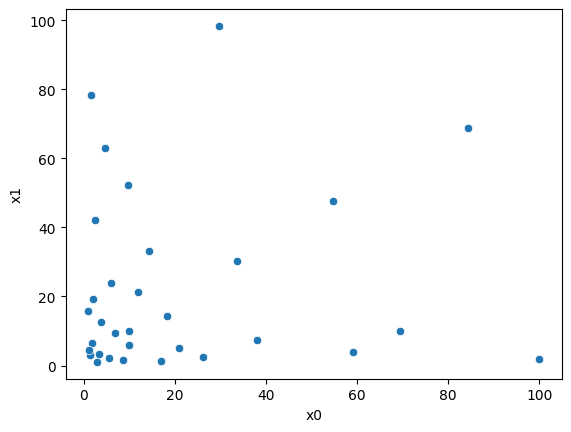

In [4]:
client = Client()

client.configure_experiment(
    name="batch_bo_test",
    parameters=[
        RangeParameterConfig(
            name=f"x{i}",
            bounds=(1, 100),
            parameter_type="float",
            scaling = 'log',
        ) for i in range(len(dim_names))
    ],
)


client.configure_optimization(objective="-loss")

client.get_next_trials(max_trials=32)

coords = get_guess_coords(client)
print(coords)
sns.scatterplot(data=coords, x="x0", y="x1")

Low value oversampling is inline with logarithmic distribution.

**Considering that we expect overexpression to be optimal when compared to underexpression, Sobol should be run on a linear scale**.

### linear parameters sobol

[INFO 09-21 11:03:45] ax.api.client: GenerationStrategy(name='Center+Sobol+MBM:fast', nodes=[CenterGenerationNode(next_node_name='Sobol'), GenerationNode(node_name='Sobol', generator_specs=[GeneratorSpec(generator_enum=Sobol, model_key_override=None)], transition_criteria=[MinTrials(transition_to='MBM'), MinTrials(transition_to='MBM')]), GenerationNode(node_name='MBM', generator_specs=[GeneratorSpec(generator_enum=BoTorch, model_key_override=None)], transition_criteria=[])]) chosen based on user input and problem structure.
[INFO 09-21 11:03:45] ax.api.client: Generated new trial 0 with parameters {'x1': 50.5, 'x2': 50.5, 'x3': 50.5, 'x4': 50.5, 'x5': 50.5, 'x6': 50.5} using GenerationNode CenterOfSearchSpace.
[INFO 09-21 11:03:45] ax.api.client: Generated new trial 1 with parameters {'x1': 89.985155, 'x2': 3.168064, 'x3': 50.079331, 'x4': 48.03314, 'x5': 75.670165, 'x6': 76.82337} using GenerationNode Sobol.
[INFO 09-21 11:03:45] ax.api.client: Generated new trial 2 with parameters {'

  trial_name         x1         x2         x3         x4         x5         x6
0        0_0  50.500000  50.500000  50.500000  50.500000  50.500000  50.500000
1        1_0  89.985155   3.168064  50.079331  48.033140  75.670165  76.823370
2        2_0  47.460701  88.378686  64.290499  93.789837  40.623424  30.923056
3        3_0   2.862055  48.041878   1.034295  14.631494  12.211955  21.191538
4        4_0  60.915635  62.024710  86.595121  71.119613  73.554862  74.198024
5        5_0  66.354110  28.174774  56.057328  52.530544  55.834131  88.982029
6        6_0  22.174820  63.716395  33.143498   8.417426  17.497260  42.360286
7        7_0  29.698588  23.615244  94.057052  87.578306  31.990584   8.598012
8        8_0  83.002069  86.880357  18.742877  29.446609  96.617581  60.875352
9        9_0  80.728448  40.719246  89.050822   4.704767  46.727840  67.246328


<Axes: xlabel='x1', ylabel='x2'>

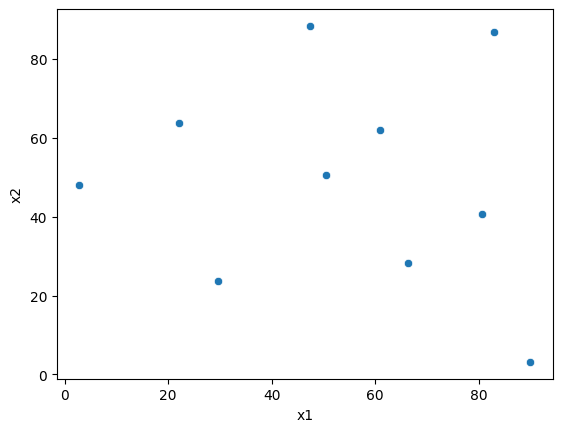

In [5]:


client = Client()

parameters=[
    RangeParameterConfig(
        name=dim,
        bounds=(1, 100),
        parameter_type="float",
        # scaling = 'log',
    ) for dim in dim_names
]


client.configure_experiment(
    name="batch_bo_test",
    parameters=parameters
)


client.configure_optimization(objective="response")

client.get_next_trials(max_trials=10)




for i, trial in ax_helper.get_obs_from_client(client, response_col='response').iterrows():
    if not pd.isna(trial['response']):
        continue

    response = resp.evaluate(trial[dim_names])
    client.complete_trial(trial_index=i, raw_data={"response": float(response)})

coords = get_guess_coords(client)
print(coords)
sns.scatterplot(data=coords, x="x1", y="x2")

A nice and informative initial guess grid is formed

[INFO 09-21 11:03:46] ax.api.client: Generated new trial 10 with parameters {'x1': 67.952925, 'x2': 96.916504, 'x3': 100.0, 'x4': 99.590283, 'x5': 86.961049, 'x6': 91.996592} using GenerationNode MBM.
[WARNING 09-21 11:03:46] ax.api.client: 6 trials requested but only 1 could be generated.
C:\Users\326po\AppData\Local\Temp\ipykernel_6104\767171169.py:19: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



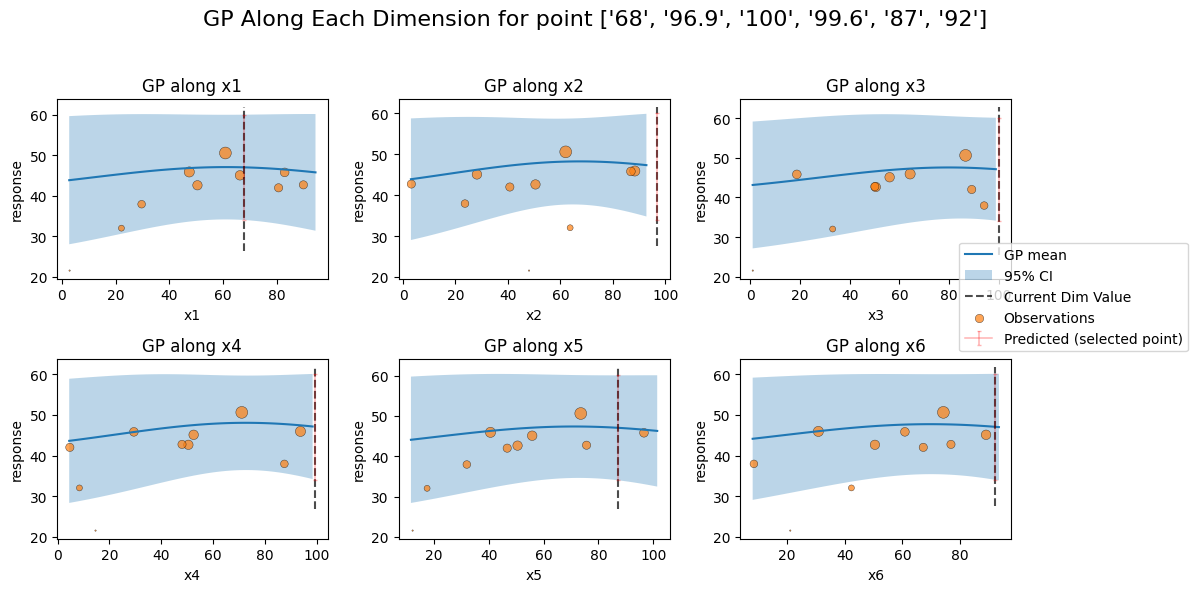

In [6]:


for i, trial in ax_helper.get_obs_from_client(client, response_col='response').iterrows():
    if not pd.isna(trial['response']):
        continue

    response = resp.evaluate(trial[dim_names])
    client.complete_trial(trial_index=i, raw_data={"response": float(response)})

client.get_next_trials(max_trials=6)

obs = ax_helper.get_obs_from_client(client, response_col='response')
plotter = GPVisualiser.GPVisualiserMatplotlib(SingleTaskGP, obs, dim_names, 'response', parameters)


for i, trial in obs.iterrows():
    if pd.isna(trial['response']):

        coords = trial.loc[dim_names]

        plotter.plot_all(torch.tensor(coords))




(<Figure size 1200x600 with 6 Axes>,
 array([<Axes: title={'center': 'GP along x1'}, xlabel='x1', ylabel='response'>,
        <Axes: title={'center': 'GP along x2'}, xlabel='x2', ylabel='response'>,
        <Axes: title={'center': 'GP along x3'}, xlabel='x3', ylabel='response'>,
        <Axes: title={'center': 'GP along x4'}, xlabel='x4', ylabel='response'>,
        <Axes: title={'center': 'GP along x5'}, xlabel='x5', ylabel='response'>,
        <Axes: title={'center': 'GP along x6'}, xlabel='x6', ylabel='response'>],
       dtype=object))

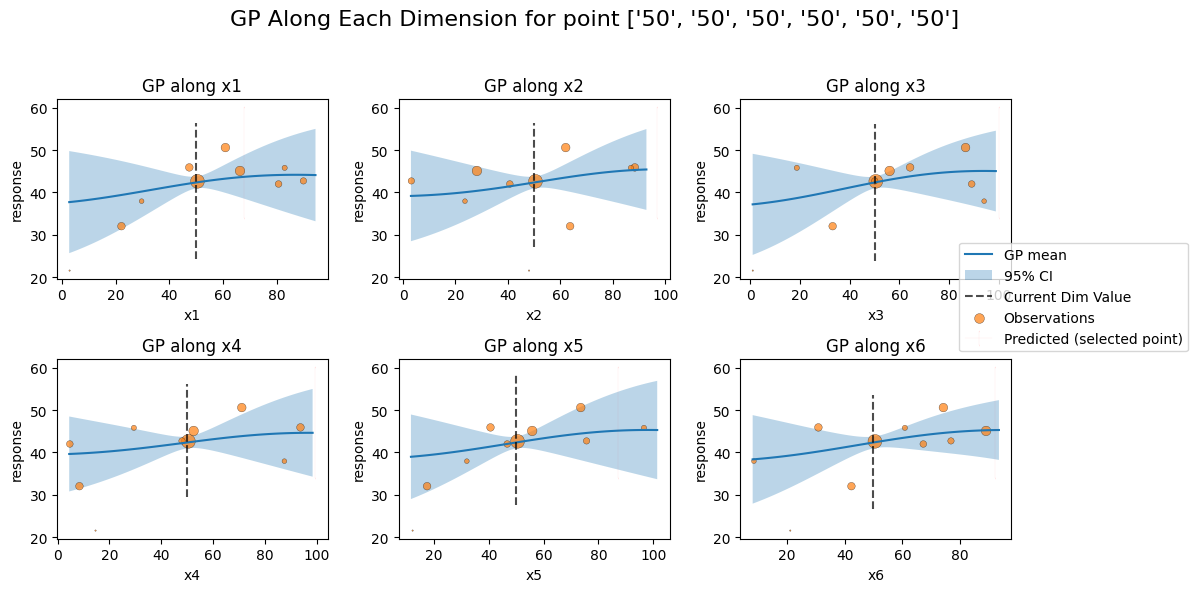

In [7]:
obs = ax_helper.get_obs_from_client(client, response_col='response')
plotter = GPVisualiser.GPVisualiserMatplotlib(SingleTaskGP, obs, dim_names, 'response', parameters)
plotter.plot_all([50,50,50,50,50,50])

In [8]:
obs

,trial_name,x1,x2,x3,x4,x5,x6,response
0,0_0,50.500000,50.500000,50.500000,50.500000,50.500000,50.500000,42.638011
1,1_0,89.985155,3.168064,50.079331,48.033140,75.670165,76.823370,42.736980
2,2_0,47.460701,88.378686,64.290499,93.789837,40.623424,30.923056,45.927319
3,3_0,2.862055,48.041878,1.034295,14.631494,12.211955,21.191538,21.563090
4,4_0,60.915635,62.024710,86.595121,71.119613,73.554862,74.198024,50.609559
5,5_0,66.354110,28.174774,56.057328,52.530544,55.834131,88.982029,45.093987
6,6_0,22.174820,63.716395,33.143498,8.417426,17.497260,42.360286,32.041039
7,7_0,29.698588,23.615244,94.057052,87.578306,31.990584,8.598012,37.954081
8,8_0,83.002069,86.880357,18.742877,29.446609,96.617581,60.875352,45.818978
9,9_0,80.728448,40.719246,89.050822,4.704767,46.727840,67.246328,42.007949


# Custom Botorch model

break

<Axes: >

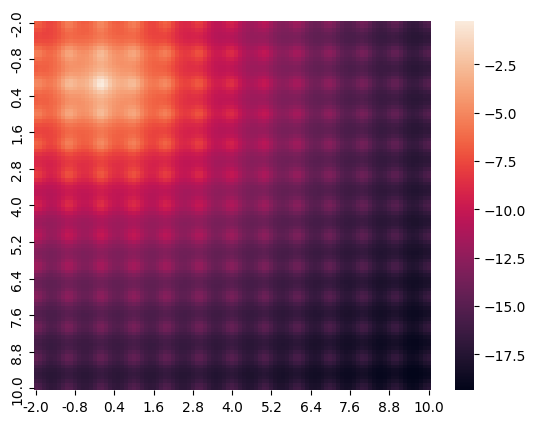

In [9]:
range_parameters = [
    RangeParameterConfig(
        name="x1", parameter_type="float", bounds=(-2, 10)
    ),
    RangeParameterConfig(
        name="x2", parameter_type="float", bounds=(-2, 10)
    )
]


def test_function(x1, x2):
    # Ackley function (commonly used for optimization benchmarks)
    a = 20
    b = 0.2
    c = 2 * math.pi
    sum_sq = 0.5 * (x1**2 + x2**2)
    cos_comp = 0.5 * (math.cos(c * x1) + math.cos(c * x2))
    ackley_grid = -a * math.exp(-b * math.sqrt(sum_sq)) - math.exp(cos_comp) + a + math.exp(1)
    return -ackley_grid


import numpy as np
grid = np.linspace(-2, 10, 101)
x1_grid, x2_grid = np.meshgrid(grid, grid)
ackley_vals = np.array([test_function(x1, x2) for x1, x2 in zip(x1_grid.ravel(), x2_grid.ravel())]).reshape(x1_grid.shape)
sns.heatmap(
    pd.DataFrame(ackley_vals, index=np.round(grid, 2), columns=np.round(grid, 2)),
    xticklabels=10,
    yticklabels=10
)


### Define the GP surrogate


MES (max value entropy search) should be the ideal choice for acquisition functions because:
* It can handle noise.
* Samples in a manner to best define the optimum.
    * Consequently, will rarely repeat exactly identical samplings.
* Has a cost/fidelity setting

In [10]:
from src.model_generation import get_full_strategy
from botorch.acquisition import qLogExpectedImprovement, qMaxValueEntropy
from botorch.models import SingleTaskGP


client = Client()

generation_strategy = get_full_strategy(gp=SingleTaskGP, acqf_class=qLogExpectedImprovement)


client.configure_experiment(parameters=range_parameters)

metric_name = "response"
dim_names = ["x1", "x2"]

client.set_generation_strategy(
    generation_strategy=generation_strategy,
)

client.configure_optimization(objective=metric_name)

from src import ax_helper
importlib.reload(ax_helper)

batch_handler = ax_helper.BatchClientHandler(client, test_function, dim_names, metric_name, batch_size=6, range_params=range_parameters)
batch_handler.get_next_batch()
batch_handler.complete_all_pending()

[INFO 09-21 11:03:47] ax.api.client: Generated new trial 0 with parameters {'x1': 4.0, 'x2': 4.0} using GenerationNode CenterOfSearchSpace.


[INFO 09-21 11:03:47] ax.api.client: Generated new trial 1 with parameters {'x1': 4.692005, 'x2': 4.674508} using GenerationNode Sobol.
[INFO 09-21 11:03:47] ax.api.client: Generated new trial 2 with parameters {'x1': 2.191071, 'x2': 3.590409} using GenerationNode Sobol.
[INFO 09-21 11:03:47] ax.api.client: Generated new trial 3 with parameters {'x1': -0.97046, 'x2': 8.066528} using GenerationNode Sobol.
[INFO 09-21 11:03:47] ax.api.client: Generated new trial 4 with parameters {'x1': 7.110821, 'x2': 0.244149} using GenerationNode Sobol.
[INFO 09-21 11:03:47] ax.api.client: Generated new trial 5 with parameters {'x1': 8.967898, 'x2': 9.646194} using GenerationNode Sobol.
[INFO 09-21 11:03:47] ax.api.client: Trial 0 marked COMPLETED.
[INFO 09-21 11:03:47] ax.api.client: Trial 1 marked COMPLETED.
[INFO 09-21 11:03:47] ax.api.client: Trial 2 marked COMPLETED.
[INFO 09-21 11:03:47] ax.api.client: Trial 3 marked COMPLETED.
[INFO 09-21 11:03:47] ax.api.client: Trial 4 marked COMPLETED.
[INFO

[INFO 09-21 11:03:51] ax.api.client: Generated new trial 6 with parameters {'x1': 6.507352, 'x2': 3.543646} using GenerationNode SingleTaskGP+qLogExpectedImprovement.
[INFO 09-21 11:03:51] ax.api.client: Generated new trial 7 with parameters {'x1': -0.37368, 'x2': 3.940973} using GenerationNode SingleTaskGP+qLogExpectedImprovement.
[INFO 09-21 11:03:51] ax.api.client: Generated new trial 8 with parameters {'x1': 10.0, 'x2': 3.731068} using GenerationNode SingleTaskGP+qLogExpectedImprovement.
[INFO 09-21 11:03:51] ax.api.client: Generated new trial 9 with parameters {'x1': 0.698339, 'x2': 1.708376} using GenerationNode SingleTaskGP+qLogExpectedImprovement.
[INFO 09-21 11:03:51] ax.api.client: Generated new trial 10 with parameters {'x1': 7.557118, 'x2': 3.009807} using GenerationNode SingleTaskGP+qLogExpectedImprovement.
[INFO 09-21 11:03:51] ax.api.client: Generated new trial 11 with parameters {'x1': 9.642711, 'x2': -1.341089} using GenerationNode SingleTaskGP+qLogExpectedImprovement.

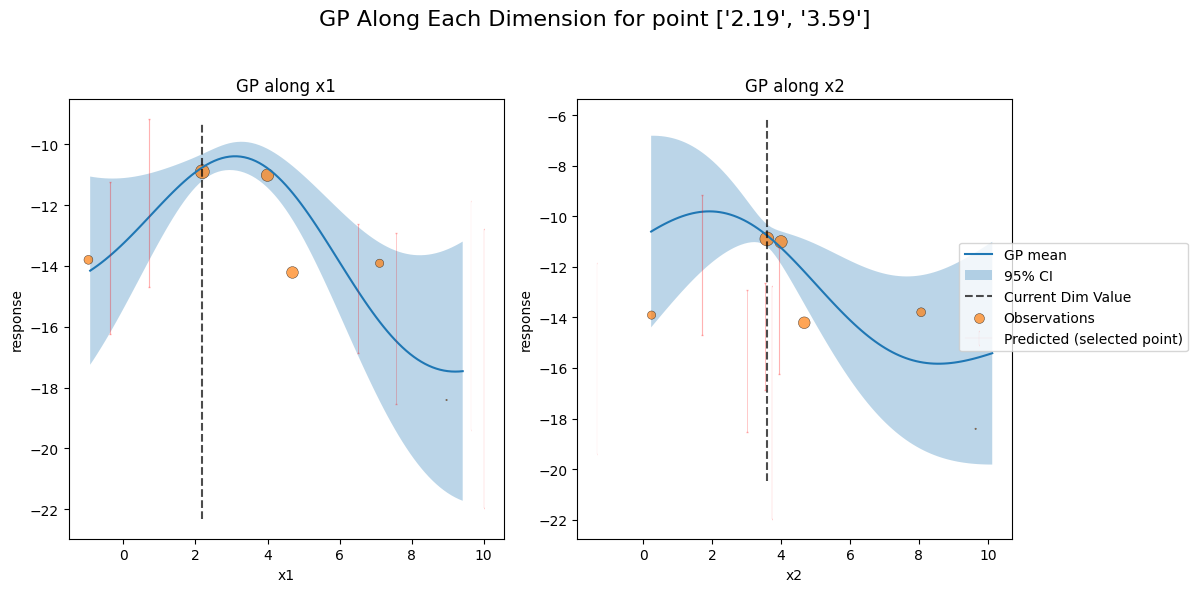

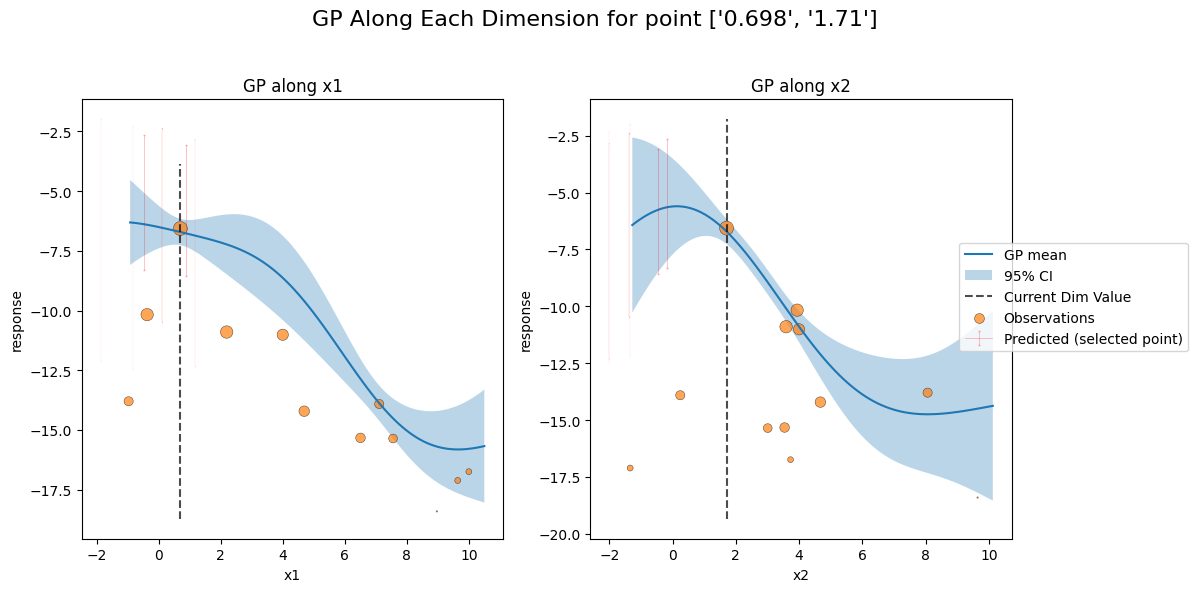

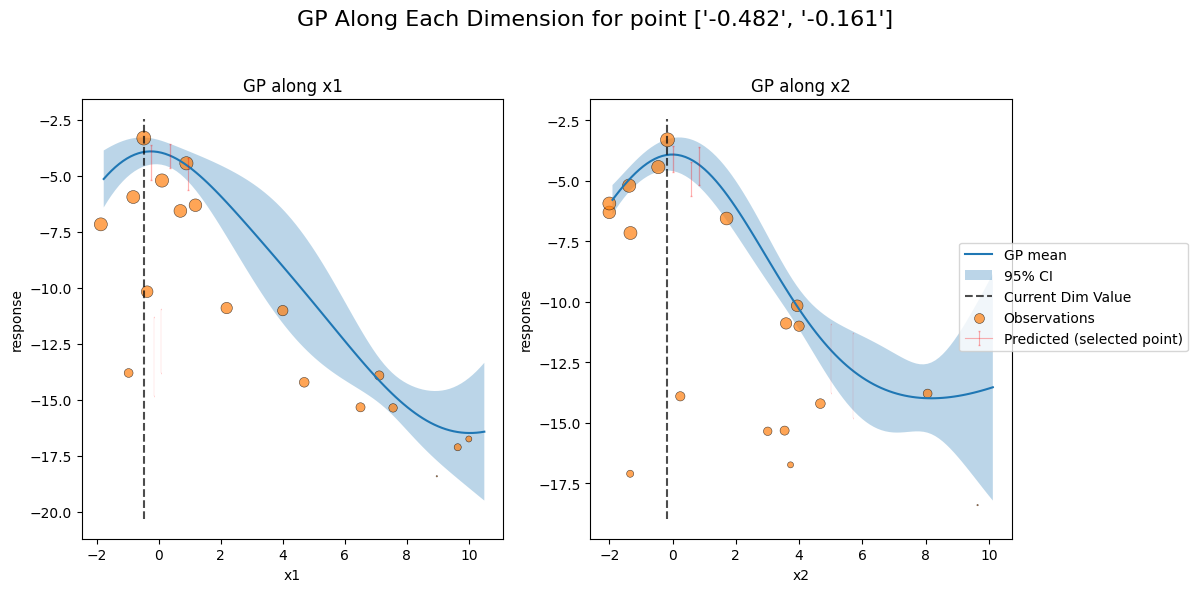

In [11]:
for _ in range(3):
    batch_handler.get_next_batch()
    batch_handler.plot_GP(SingleTaskGP)
    batch_handler.complete_all_pending()

In [12]:
obs

,trial_name,x1,x2,x3,x4,x5,x6,response
0,0_0,50.500000,50.500000,50.500000,50.500000,50.500000,50.500000,42.638011
1,1_0,89.985155,3.168064,50.079331,48.033140,75.670165,76.823370,42.736980
2,2_0,47.460701,88.378686,64.290499,93.789837,40.623424,30.923056,45.927319
3,3_0,2.862055,48.041878,1.034295,14.631494,12.211955,21.191538,21.563090
4,4_0,60.915635,62.024710,86.595121,71.119613,73.554862,74.198024,50.609559
5,5_0,66.354110,28.174774,56.057328,52.530544,55.834131,88.982029,45.093987
6,6_0,22.174820,63.716395,33.143498,8.417426,17.497260,42.360286,32.041039
7,7_0,29.698588,23.615244,94.057052,87.578306,31.990584,8.598012,37.954081
8,8_0,83.002069,86.880357,18.742877,29.446609,96.617581,60.875352,45.818978
9,9_0,80.728448,40.719246,89.050822,4.704767,46.727840,67.246328,42.007949
